In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv('housing.csv')

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


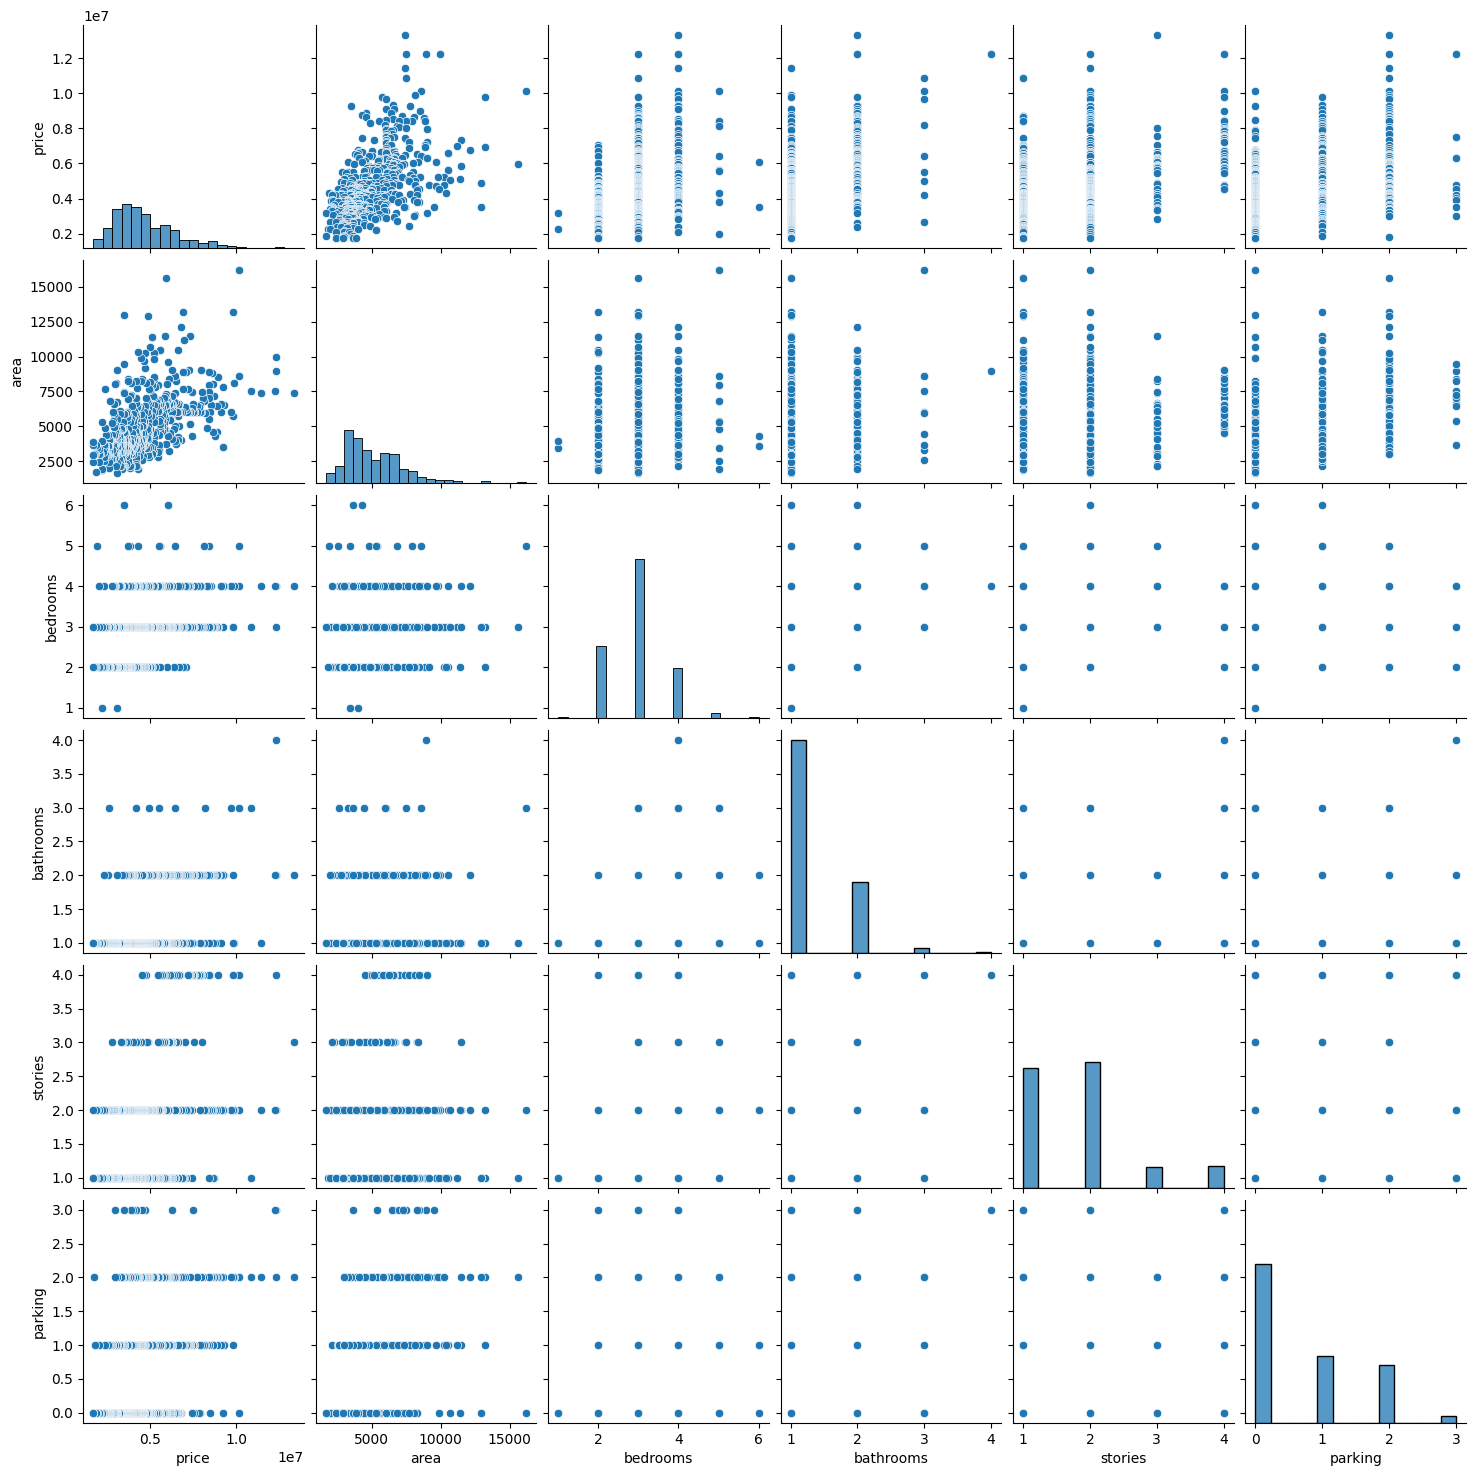

In [47]:
sns.pairplot(df)

In [48]:
mapping = {'yes': 1, 'no': 0 , 'furnished' : 1 , 'unfurnished' : 0 , 'semi-furnished' : .5}

df = df.replace(mapping)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [49]:
x= df.drop('price', axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [50]:
reg = linear_model.LinearRegression()
reg.fit(x,df.price)

LinearRegression()

In [51]:
reg.coef_

array([2.43906887e+02, 1.19474386e+05, 9.88888287e+05, 4.50391518e+05,
       4.23100741e+05, 2.98030507e+05, 3.57926360e+05, 8.72936027e+05,
       8.53633595e+05, 2.79785637e+05, 6.47055599e+05, 4.26375563e+05])

In [52]:
reg.intercept_

-324509.0498633748

In [53]:
prediction =  reg.predict(x)

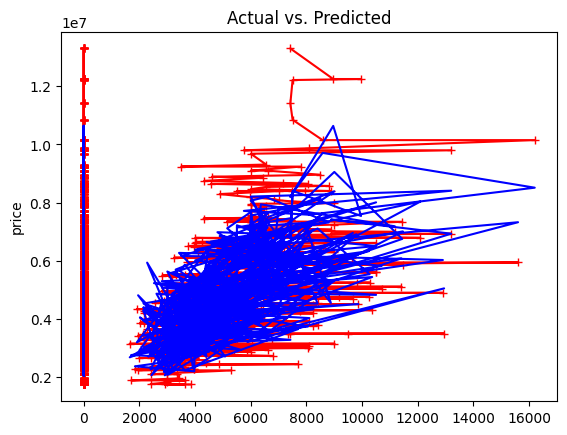

In [59]:
plt.plot(x, df['price'], color='red', label='Predictions' ,marker='+')
plt.plot(x, prediction, color='blue', label='Line')
plt.ylabel('price')
plt.title('Actual vs. Predicted')
plt.show;

In [55]:
z = df.drop('price', axis=1)  
y = df['price'] 

z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)


In [56]:
reg1 = linear_model.LinearRegression()
reg1.fit(z_train,y_train)


LinearRegression()

In [57]:
pred2 = reg1.predict(z_test)

cost = mean_squared_error(y_test,pred2)

print(cost)


1771751116594.0352


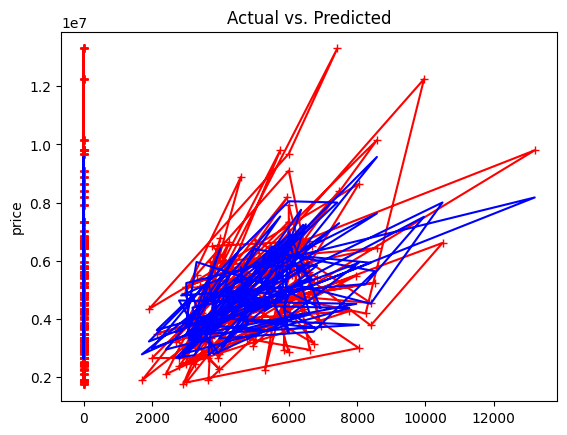

In [61]:
plt.plot(z_test, y_test, color='red', label='Predictions' ,marker='+')
plt.plot(z_test, pred2, color='blue', label='Line')
plt.ylabel('price')
plt.title('Actual vs. Predicted')
plt.show;